Uses REBOUND commit db3ae2cea8f3462463d3e0c5788a34625bb49a9c. 

Will not give same results if i use same commit as for resonant dataset.

In [1]:
import rebound
rebound.__version__

'3.8.1'

In [2]:
if rebound.__githash__ != 'db3ae2cea8f3462463d3e0c5788a34625bb49a9c':
    print('Should checkout commit above to ensure this runs correctly')

Should checkout commit above to ensure this runs correctly


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dask.dataframe as dd
%matplotlib inline

pathtofolders = '/mnt/ssd/workspace/stability/'
safolder = 'stabilitydataset/data/random/simulation_archives/runs/'

# There is more precision in numbers in csv. To see it in notebook uncomment first line

In [4]:
#pd.set_option('display.float_format', '{:.12E}'.format)
df = pd.read_csv(pathtofolders+"stabilitydataset/data/random/labels.csv", index_col = 0)
df.head()

,runstring,instability_time,shadow_instability_time,Stable
0,0000000.bin,1.235644e+07,8.315081e+07,False
1,0000001.bin,1.348749e+05,2.133072e+05,False
2,0000002.bin,1.276381e+04,9.321519e+03,False
3,0000003.bin,1.000000e+09,1.000000e+09,True
4,0000004.bin,8.791888e+01,8.791888e+01,False


In [5]:
def gettimes(sa, times):
    sim = sa[0]
    sim.collision_resolve = collision
    
    tsim = np.zeros(Nout)
    for i, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        tsim[i] = sim.t
    return tsim

def collision(reb_sim, col):
    reb_sim.contents._status = 5
    return 0

def orbtseries(row):
    if row['instability_time'] < 1.e4:
        return np.zeros((Nout, 18))
    
    sa = rebound.SimulationArchive(pathtofolders+randomsa+'sa'+row['runstring'])
    val = runsim(sa, times)
    return val

def runorbtseries(sa, times):
    sim = sa[0]
    sim.collision_resolve = collision
    
    val = np.zeros((Nout, 18))
    for i, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        orbits = sim.calculate_orbits()
        for j, o in enumerate(orbits):
            val[i,6*j+0] = o.a
            val[i,6*j+1] = o.e
            val[i,6*j+2] = o.inc
            val[i,6*j+3] = o.Omega
            val[i,6*j+4] = o.pomega
            val[i,6*j+5] = o.M   
    return val

def applyorbtseries(df):
    return df.apply(orbtseries, axis=1)

def testfunc(a, b):
    print(a+b)
    
def testrun(row, times, Nout, safolder, testfunc):
    testfunc(3, 2)
    return 0

def test(df, times, Nout, safolder):
    return df.apply(testrun, args=(times, Nout, safolder, testfunc), axis=1)

In [6]:
ddf = dd.from_pandas(df, npartitions=24)

In [9]:
res = ddf.map_partitions(test, times, Nout, safolder, meta = (None, 'i8')).compute(scheduler='processes')

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [8]:
Nsys = df.shape[0]
Nout = 1729
times = np.linspace(0, 1e4, Nout)

In [21]:
row = df.loc[0]
sa = rebound.SimulationArchive(pathtofolders+randomsa+'sa'+row['runstring'])
tsim = gettimes(sa, times)

In [22]:
tsim

array([0.00000000e+00, 5.81959137e+00, 1.16045423e+01, ...,
       9.98842794e+03, 9.99424753e+03, 1.00000325e+04])

# Test Reproducibility

In [23]:
row = df.loc[0]
sa = rebound.SimulationArchive(pathtofolders+randomsa+'sa'+row['runstring'])
tmax = sa[1].t
sim = sa[0]
sim.integrate(tmax, exact_finish_time=0)
sim.status()

---------------------------------
REBOUND version:     	3.4.0
REBOUND built on:    	Mar  6 2019 13:31:55
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	1.0000000277011167e+06
Current timestep:    	0.034640
---------------------------------
<rebound.Particle object, m=1.0 x=-3.629182535523935e-05 y=1.1843522755585877e-05 z=9.692032962716541e-08 vx=-2.7539975849184616e-05 vy=-0.00021744008363471437 vz=-8.43155749795529e-07>
<rebound.Particle object, m=3.4140160192072926e-05 x=0.9225193262954728 y=0.4107034942938748 z=-0.007950327673330494 vx=-2.4266312875245175 vy=5.726893721352419 vz=0.04678499897728613>
<rebound.Particle object, m=1.8787249753397036e-05 x=0.16981871403865156 y=-1.2279135896541034 z=0.011612920399274694 vx=5.527494030376944 vy=0.9037972044771627 vz=-0.06443832825556559>
<rebound.Particle object, m=1.8268998599127623e-06 x=0.87932635067516 y=-1.5303994574427984 z=-0.02390372135108166 vx=3.5793674392077772 vy=2.705759021771257 vz=0.249891834123

In [24]:
sa[1].status()

---------------------------------
REBOUND version:     	3.4.0
REBOUND built on:    	Mar  6 2019 13:31:55
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	1.0000000277011167e+06
Current timestep:    	0.034640
---------------------------------
<rebound.Particle object, m=1.0 x=-3.629182535523935e-05 y=1.1843522755585877e-05 z=9.692032962716541e-08 vx=-2.7539975849184616e-05 vy=-0.00021744008363471437 vz=-8.43155749795529e-07>
<rebound.Particle object, m=3.4140160192072926e-05 x=0.9225193262954728 y=0.4107034942938748 z=-0.007950327673330494 vx=-2.4266312875245175 vy=5.726893721352419 vz=0.04678499897728613>
<rebound.Particle object, m=1.8787249753397036e-05 x=0.16981871403865156 y=-1.2279135896541034 z=0.011612920399274694 vx=5.527494030376944 vy=0.9037972044771627 vz=-0.06443832825556559>
<rebound.Particle object, m=1.8268998599127623e-06 x=0.87932635067516 y=-1.5303994574427984 z=-0.02390372135108166 vx=3.5793674392077772 vy=2.705759021771257 vz=0.249891834123

In [26]:
def testsim(sa, times):
    sim = sa[0]
    sim.collision_resolve = collision
    
    val = np.zeros((Nout, 18))
    for i, time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        orbits = sim.calculate_orbits()
        for j, o in enumerate(orbits):
            val[i,6*j+0] = o.a
            val[i,6*j+1] = o.e
            val[i,6*j+2] = o.inc
            val[i,6*j+3] = o.Omega
            val[i,6*j+4] = o.pomega
            val[i,6*j+5] = o.M
    return sim

In [27]:
import rebound
row = df.loc[0]
sa = rebound.SimulationArchive(pathtofolders+randomsa+'sa'+row['runstring'])
t1 = sa[1].t
sim = testsim(sa, times)

In [11]:
sim.integrate(t1, exact_finish_time=0)

In [12]:
sim.status()

---------------------------------
REBOUND version:     	3.4.0
REBOUND built on:    	Mar  6 2019 13:31:55
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	1.0000000277011167e+06
Current timestep:    	0.034640
---------------------------------
<rebound.Particle object, m=1.0 x=-3.629182535523935e-05 y=1.1843522755585877e-05 z=9.692032962716541e-08 vx=-2.7539975849184616e-05 vy=-0.00021744008363471437 vz=-8.43155749795529e-07>
<rebound.Particle object, m=3.4140160192072926e-05 x=0.9225193262954728 y=0.4107034942938748 z=-0.007950327673330494 vx=-2.4266312875245175 vy=5.726893721352419 vz=0.04678499897728613>
<rebound.Particle object, m=1.8787249753397036e-05 x=0.16981871403865156 y=-1.2279135896541034 z=0.011612920399274694 vx=5.527494030376944 vy=0.9037972044771627 vz=-0.06443832825556559>
<rebound.Particle object, m=1.8268998599127623e-06 x=0.87932635067516 y=-1.5303994574427984 z=-0.02390372135108166 vx=3.5793674392077772 vy=2.705759021771257 vz=0.249891834123

In [13]:
sa[1].status()

---------------------------------
REBOUND version:     	3.4.0
REBOUND built on:    	Mar  6 2019 13:31:55
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	1.0000000277011167e+06
Current timestep:    	0.034640
---------------------------------
<rebound.Particle object, m=1.0 x=-3.629182535523935e-05 y=1.1843522755585877e-05 z=9.692032962716541e-08 vx=-2.7539975849184616e-05 vy=-0.00021744008363471437 vz=-8.43155749795529e-07>
<rebound.Particle object, m=3.4140160192072926e-05 x=0.9225193262954728 y=0.4107034942938748 z=-0.007950327673330494 vx=-2.4266312875245175 vy=5.726893721352419 vz=0.04678499897728613>
<rebound.Particle object, m=1.8787249753397036e-05 x=0.16981871403865156 y=-1.2279135896541034 z=0.011612920399274694 vx=5.527494030376944 vy=0.9037972044771627 vz=-0.06443832825556559>
<rebound.Particle object, m=1.8268998599127623e-06 x=0.87932635067516 y=-1.5303994574427984 z=-0.02390372135108166 vx=3.5793674392077772 vy=2.705759021771257 vz=0.249891834123

# Split into chunks with dask

In [8]:
ddf = dd.from_pandas(df, npartitions=24)

In [9]:
ddf.tail()

,runstring,instability_time,shadow_instability_time,Stable
24995,0024995.bin,1.843085e+04,5.927630e+04,False
24996,0024996.bin,1.868255e+03,2.336566e+03,False
24997,0024997.bin,6.939622e+04,1.870859e+04,False
24998,0024998.bin,3.230627e+04,2.883784e+04,False
24999,0024999.bin,1.000000e+09,1.000000e+09,True


In [10]:
%%time
res = ddf.map_partitions(applyorbtseries, meta = (None, 'i8')).compute(scheduler='processes') 

/mnt/ssd/workspace/rebound/rebound/simulation.py:518: RuntimeWarning: WHFast convergence issue. Timestep is larger than at least one orbital period.
  warnings.warn(msg[1:], RuntimeWarning)


CPU times: user 20.3 s, sys: 55.3 s, total: 1min 15s
Wall time: 5min 24s


In [11]:
matrix = np.concatenate(res.values).ravel().reshape((Nsys, Nout, 18))

In [12]:
matrix.shape

(25000, 1729, 18)

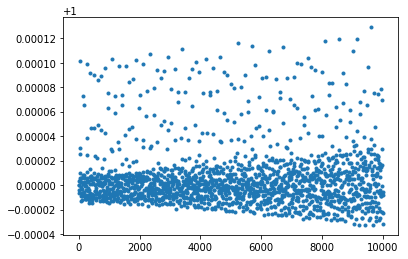

In [13]:
fig, ax = plt.subplots()
ax.plot(times, matrix[3, :,0], '.')